# HW8 Unsupervised Learning

## Part 1: PCA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

plt.style.use('ggplot')

In [2]:
college = pd.read_csv("College.csv")
college["Private"] = college["Private"].astype("category")
college["Private"] = college["Private"].replace(to_replace = ["Yes", "No"], value = [1, 0])
college["Private"].dtype
X = pd.DataFrame(scale(college), columns = college.columns)
pca = PCA().fit(X)

In [3]:
#find the component loadings
def loadings():
    loadings = pca.components_
    results = pd.DataFrame(loadings.T)
    col = []
    for i in range(1, loadings.shape[0]+1):
        col.append("Component{}".format(i)) 
    results.columns = col
    results.index= X.columns
    return results
component_loadings = loadings()

In [4]:
component_loadings

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15,Component16,Component17,Component18
Private,0.089010,-0.345879,0.151387,0.231135,0.044286,-0.031448,0.178345,0.032314,0.084985,0.259596,-0.679758,0.245690,0.400649,-0.010057,0.023202,-0.005373,0.044796,0.007795
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283
Accept,0.153797,0.372557,-0.025351,0.317486,0.031438,0.013074,-0.015474,-0.054225,-0.165274,0.089482,-0.142627,0.004545,-0.073616,0.293398,0.033349,-0.146347,-0.512188,-0.547462
Enroll,0.117797,0.399697,-0.027576,0.204836,-0.065667,-0.043065,-0.008237,0.063261,-0.116813,0.074073,-0.105826,-0.034260,0.059072,-0.446273,-0.081525,0.028481,-0.403907,0.607174
Top10perc,0.360349,-0.016238,0.004681,-0.107519,-0.388227,-0.059923,-0.144406,-0.097143,0.355676,0.059358,0.022126,-0.015181,0.044352,0.000092,-0.106170,0.697422,-0.148018,-0.146308
Top25perc,0.344751,0.017730,-0.058948,-0.146260,-0.409809,0.020615,-0.079889,-0.078063,0.422445,0.043560,-0.138169,-0.231232,-0.099783,0.023782,0.148674,-0.616897,0.050194,0.080606
F.Undergrad,0.094088,0.410732,-0.016806,0.143032,-0.046589,-0.045743,0.000282,0.083930,-0.049761,0.050439,-0.078360,-0.062500,0.069732,-0.525078,-0.053386,0.009842,0.569725,-0.408938
P.Undergrad,-0.017483,0.293064,0.149371,-0.097767,0.327967,-0.196779,0.162965,0.569890,0.543201,-0.229478,-0.045070,0.121136,-0.022846,0.126137,0.019558,0.020679,-0.050648,0.008963
Outstate,0.327664,-0.191518,0.066363,0.128799,0.203252,-0.020296,0.094948,-0.004122,-0.011433,0.197326,-0.064253,0.255436,-0.803653,-0.128007,-0.057204,0.041948,0.078622,0.048023
Room.Board,0.266534,-0.093979,0.182114,0.182427,0.526257,0.183029,0.145142,-0.248673,0.244240,0.189863,0.280765,-0.485832,0.201397,-0.072308,-0.055970,0.003513,-0.028890,0.000368


From the above table, the variables "Top10perc", "Top25perc", "Expend" and "Outstate" seem to have the highest correlation with the first principal component; variables "F.Undergrad", "Enroll", "Accept" and "Private" seem to have
the largest corrletion with the second principal component.

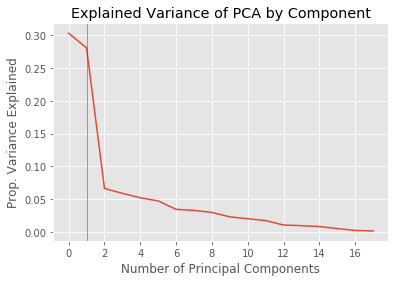

Variance Explained by Each Principal Component:
[ 0.30332963  0.2808937   0.06608801  0.05867382  0.05196692  0.04712187
  0.03424993  0.03264848  0.02955748  0.02277071  0.01987894  0.01705642
  0.01030872  0.00930944  0.00798412  0.00488356  0.00200166  0.00127658]


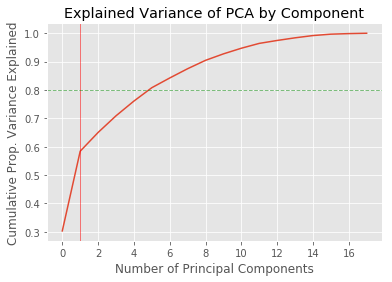

Cumulative Variance Explained by Principal Components:
[ 0.30332963  0.58422333  0.65031134  0.70898515  0.76095207  0.80807394
  0.84232387  0.87497235  0.90452983  0.92730054  0.94717949  0.96423591
  0.97454463  0.98385408  0.99183819  0.99672176  0.99872342  1.        ]


In [5]:
# find variance explained
def var_explained():
    
    ax = figure().gca()
    ax.plot(pca.explained_variance_ratio_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Prop. Variance Explained')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()
    
var_explained()
print(r'Variance Explained by Each Principal Component:')
print(pca.explained_variance_ratio_)

# cummulative variance explained 
def cum_var_explained():
    
    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Prop. Variance Explained')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.axhline(y=0.8, linewidth=1, color='g', linestyle= '--',alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()
    
cum_var_explained()
print(r'Cumulative Variance Explained by Principal Components:')
print(np.cumsum(pca.explained_variance_ratio_))

According to the above results, around 58.42% of the variation can be explained by the first two principal components.

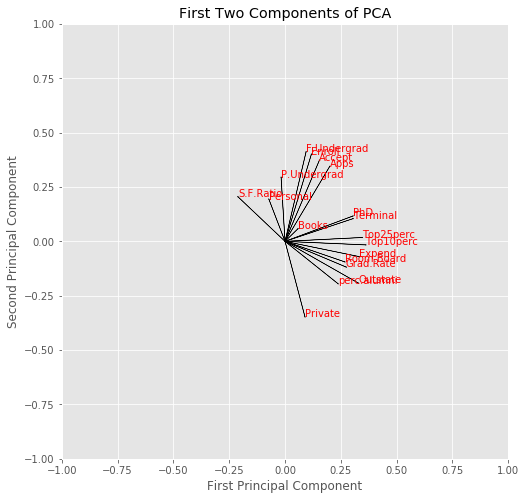

In [6]:
plt.figure(figsize = (8,8))
for i in range(len(X.columns)):
    plt.annotate(X.columns[i], (component_loadings.iloc[i,0], component_loadings.iloc[i, 1]), color='red')
    plt.arrow(0,0,component_loadings.iloc[i,0], component_loadings.iloc[i,1], color = 'black')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Components of PCA")
plt.show()

## Part 2: Clustering States

### 1. 

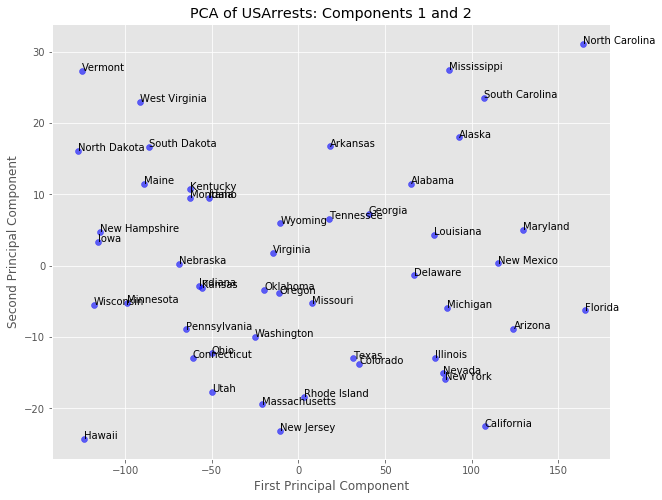

In [7]:
data = pd.read_csv("USArrests.csv", index_col = 0)
pca = PCA()
x = pd.DataFrame(data, index = data.index, columns = data.columns)
x_trans = pca.fit(x).transform(x)


plt.figure()
plt.figure(figsize = (10,8))
plt.scatter(x_trans[:,0], x_trans[:,1], color= 'blue', alpha=.6)
for i, txt in enumerate(data.index.unique().tolist()):
    plt.annotate(txt,(x_trans[i,0],x_trans[i, 1]))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of USArrests: Components {} and {}'.format(1, 2))
plt.xlabel(r'First Principal Component')
plt.ylabel(r'Second Principal Component')
plt.show()

### 2 - 4. Perform K-means clustering 

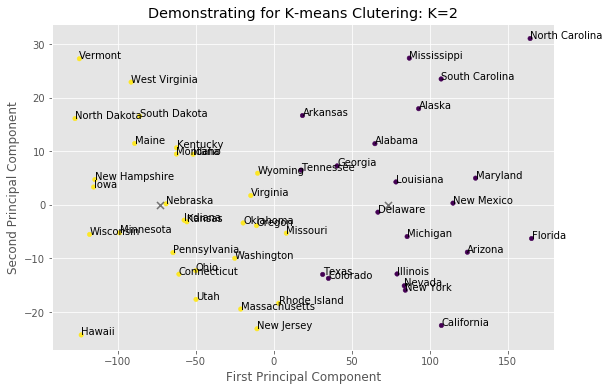

Describe the result of clusters:
If we divide the data into two clusters, then the states in the first cluster are:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']

If we divide the data into two clusters, then the states in the second cluster are:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [8]:
from sklearn.cluster import KMeans
state = x.index
# k = 2
kmeans2 = KMeans(n_clusters=2).fit(x)

plt.figure(figsize = (9,6))
plt.scatter(x_trans[:, 0], x_trans[:, 1], c=kmeans2.labels_, s=20, cmap='viridis')
centers = pca.fit_transform(kmeans2.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker = 'x', s=50, alpha=0.5)
for i, txt in enumerate(data.index.unique().tolist()):
    plt.annotate(txt,(x_trans[i,0],x_trans[i,1]))
plt.xlabel(r'First Principal Component')
plt.ylabel(r'Second Principal Component')
plt.title(r'Demonstrating for K-means Clutering: K=2')
plt.show()

print(r'Describe the result of clusters:')
print(r'If we divide the data into two clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if kmeans2.labels_[i] == 0])
print()
print(r'If we divide the data into two clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if kmeans2.labels_[i] == 1])

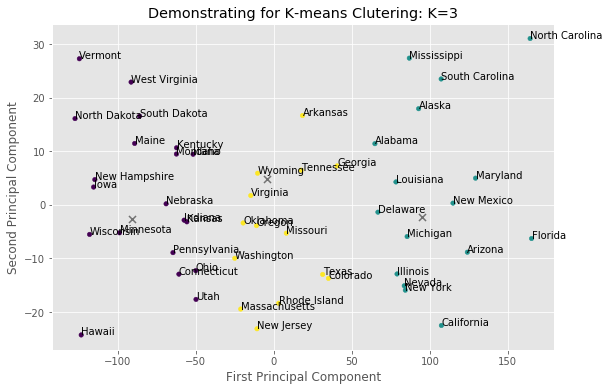

Describe the result of clusters:
If we divide the data into three clusters, then the states in the first cluster are:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

If we divide the data into three clusters, then the states in the second cluster are:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

If we divide the data into three clusters, then the states in the third cluster are:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


In [9]:
# k = 3
kmeans3 = KMeans(n_clusters=3).fit(x)

plt.figure(figsize = (9,6))
plt.scatter(x_trans[:, 0], x_trans[:, 1], c=kmeans3.labels_, s=20, cmap='viridis')
for i, txt in enumerate(data.index.unique().tolist()):
    plt.annotate(txt,(x_trans[i,0],x_trans[i, 1]))
centers = pca.fit_transform(kmeans3.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker = 'x', s=50, alpha=0.5)
plt.xlabel(r'First Principal Component')
plt.ylabel(r'Second Principal Component')
plt.title(r'Demonstrating for K-means Clutering: K=3')
plt.show()

print(r'Describe the result of clusters:')
print(r'If we divide the data into three clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if kmeans3.labels_[i] == 0])
print()
print(r'If we divide the data into three clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if kmeans3.labels_[i] == 1])
print()
print(r'If we divide the data into three clusters, then the states in the third cluster are:')
print([state[i] for i in range(len(state)) if kmeans3.labels_[i] == 2])

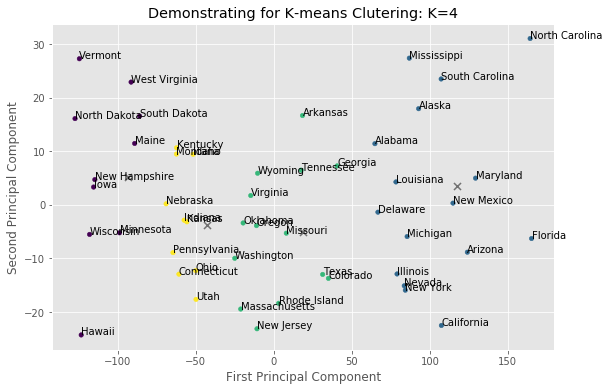

Describe the result of clusters:
If we divide the data into four clusters, then the states in the first cluster are:
['Hawaii', 'Iowa', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

If we divide the data into four clusters, then the states in the second cluster are:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

If we divide the data into four clusters, then the states in the third cluster are:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

If we divide the data into four clusters, then the states in the fourth cluster are:
['Connecticut', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Montana', 'Nebraska', 'Ohio', 'Pennsylvania', 'Utah']


In [10]:
# k = 4
kmeans4 = KMeans(n_clusters=4).fit(x)

plt.figure(figsize = (9,6))
plt.scatter(x_trans[:, 0], x_trans[:, 1], c=kmeans4.labels_, s=20, cmap='viridis')
for i, txt in enumerate(data.index.unique().tolist()):
    plt.annotate(txt,(x_trans[i,0],x_trans[i, 1]))
centers = pca.fit_transform(kmeans4.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker ='x', s=50, alpha=0.5)
plt.xlabel(r'First Principal Component')
plt.ylabel(r'Second Principal Component')
plt.title(r'Demonstrating for K-means Clutering: K=4')
plt.show()

print(r'Describe the result of clusters:')
print(r'If we divide the data into four clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if kmeans4.labels_[i] == 0])
print()
print(r'If we divide the data into four clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if kmeans4.labels_[i] == 1])
print()
print(r'If we divide the data into four clusters, then the states in the third cluster are:')
print([state[i] for i in range(len(state)) if kmeans4.labels_[i] == 2])
print()
print(r'If we divide the data into four clusters, then the states in the fourth cluster are:')
print([state[i] for i in range(len(state)) if kmeans4.labels_[i] == 3])

### 5. K-means clustering on principal components score vectors

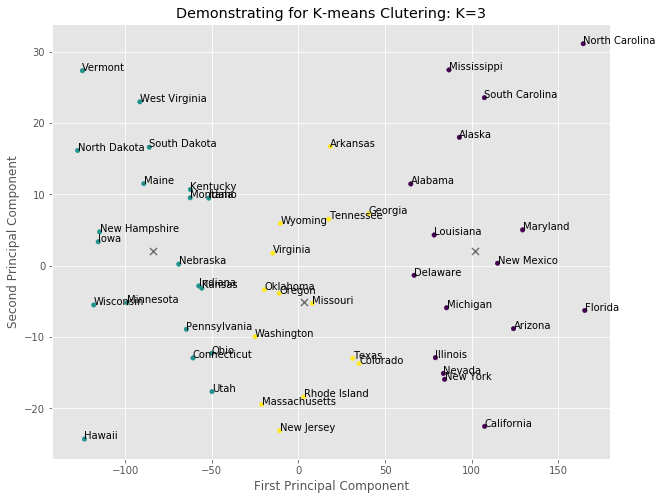

Describe the result of clusters:
If we divide the data into three clusters, then the states in the first cluster are:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

If we divide the data into three clusters, then the states in the second cluster are:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

If we divide the data into three clusters, then the states in the third cluster are:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


In [13]:
# k = 3
kmeans_s = KMeans(n_clusters=3).fit(x_trans)

plt.figure(figsize = (10,8))
plt.scatter(x_trans[:, 0], x_trans[:, 1], c=kmeans_s.labels_, s=20, cmap='viridis')
for i, txt in enumerate(data.index.unique().tolist()):
    plt.annotate(txt,(x_trans[i,0],x_trans[i, 1]))
centers = kmeans_s.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker ='x', s=50, alpha=0.5)
plt.xlabel(r'First Principal Component')
plt.ylabel(r'Second Principal Component')
plt.title(r'Demonstrating for K-means Clutering: K=3')
plt.show()

print(r'Describe the result of clusters:')
print(r'If we divide the data into three clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if kmeans_s.labels_[i] == 0])
print()
print(r'If we divide the data into three clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if kmeans_s.labels_[i] == 1])
print()
print(r'If we divide the data into three clusters, then the states in the third cluster are:')
print([state[i] for i in range(len(state)) if kmeans_s.labels_[i] == 2])

It can be seen that the k-means clustering using principal components scores are the same as the one we have using the raw data. The only difference is that the centeriod for each cluster is changed. The second principal component is much lower for the centeriod in the second cluster relative to the one using raw data. 

## Compare and Contrast Difference

### Hierarchical Clustering 6~7

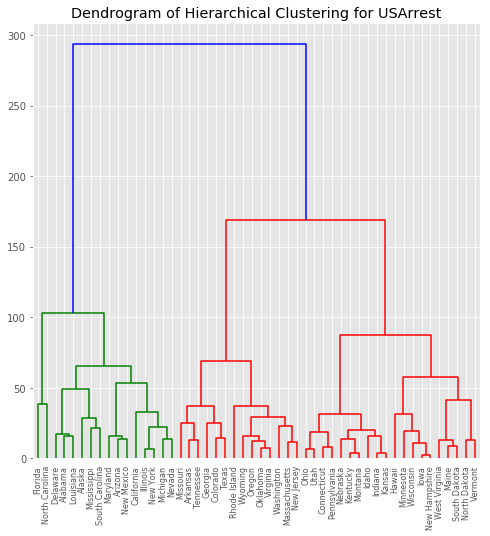

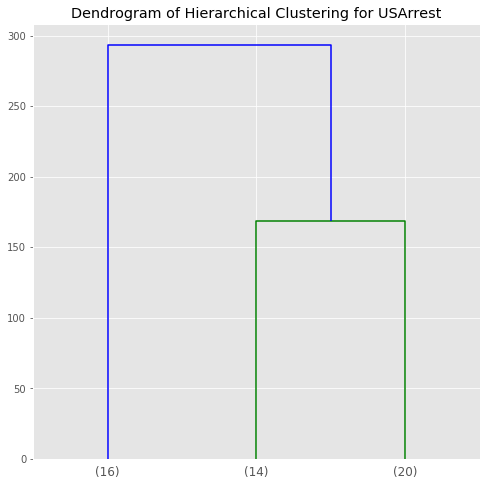

In [17]:
#from sklearn.cluster import AgglomerativeClustering
import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage
x_ac = linkage(x,'complete')
plt.figure(figsize = (8,8))
dendrogram(x_ac, labels = x.index)
plt.title(r'Dendrogram of Hierarchical Clustering for USArrest')
plt.show()

plt.figure(figsize = (8,8))
dendrogram(x_ac, labels = x.index, truncate_mode='lastp', p=3)
plt.title(r'Dendrogram of Hierarchical Clustering for USArrest')
plt.show()

### 8. Standardized Data

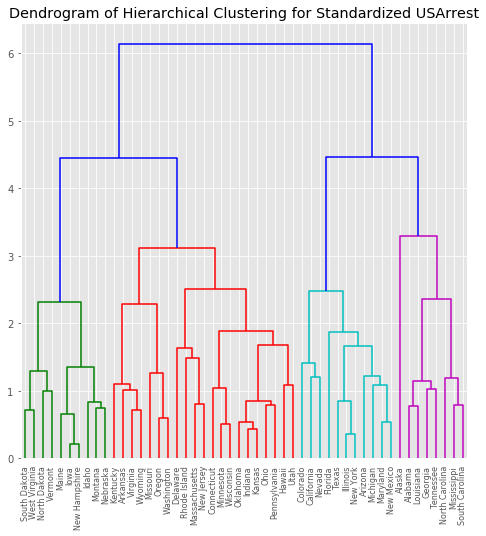

In [22]:
x_std = pd.DataFrame(scale(data), index = data.index, columns = data.columns)
x_s = linkage(x_std,'complete')
plt.figure(figsize = (8,8))
dendrogram(x_s, labels = x.index)
plt.title(r'Dendrogram of Hierarchical Clustering for Standardized USArrest')
plt.show()

The clustering is different from the one we obtained using un-normalized data. The states seem to demonstrate significant difference at earlier stage in the normalized data. However, the normalization is necessary since the scale and unit are quite different for different variables.  